In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
superStoreDf = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Superstore%20Dataset/Sample%20-%20Superstore.csv", encoding='windows-1252')

In [3]:
superStoreDf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
superStoreDf.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
superStoreDf["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
superStoreDf["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [7]:
superStoreDf["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

In [8]:
superStoreDf['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [9]:
superStoreDf['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [10]:
superStoreDf['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
superStoreDf['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [12]:
superStoreDf.drop(['Customer Name','Country','Postal Code', 'Row ID', 'Product Name'], axis=1, inplace=True)
superStoreDf['Order Date'] = pd.to_datetime(superStoreDf['Order Date'], format='%m/%d/%Y')
superStoreDf['Ship Date'] = pd.to_datetime(superStoreDf['Ship Date'], format='%m/%d/%Y')
superStoreDf.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
regions = superStoreDf['Region'].unique()
shipModes = superStoreDf['Ship Mode'].unique()
categories = superStoreDf['Category'].unique()

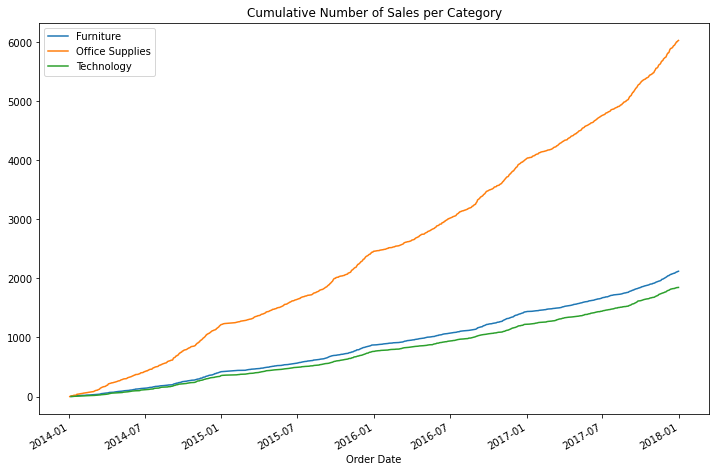

In [14]:
dfbyCatOrderDate = superStoreDf.groupby(['Category','Order Date'])
plt.figure(figsize=(12,8))
for cat in categories:
    data = dfbyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    data.plot(kind='line', label=cat)
plt.title("Cumulative Number of Sales per Category")
plt.legend()
plt.show()

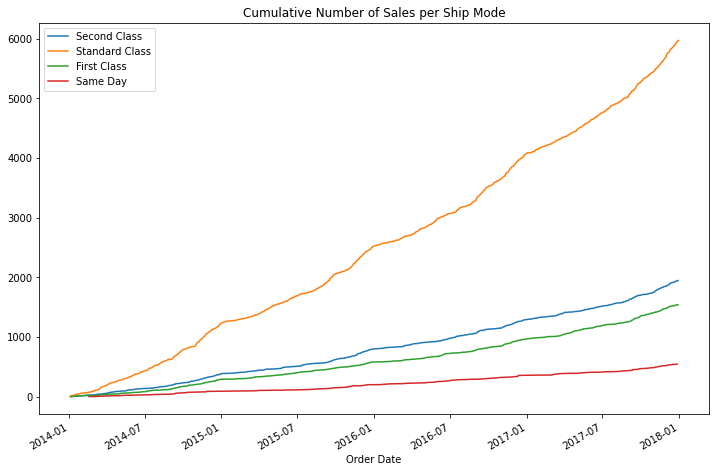

In [15]:
dfbyShipOrderDate = superStoreDf.groupby(['Ship Mode','Order Date'])
plt.figure(figsize=(12,8))
for shipMode in shipModes:
    data = dfbyShipOrderDate['Sales'].count()[shipMode]
    data = data.cumsum()
    data.plot(kind='line', label=shipMode)
plt.title("Cumulative Number of Sales per Ship Mode")
plt.legend()
plt.show()

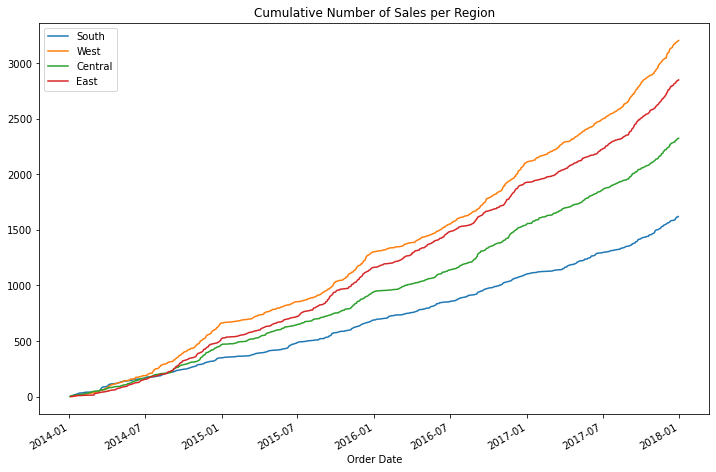

In [16]:
dfbyRegionOrderDate = superStoreDf.groupby(['Region','Order Date'])
plt.figure(figsize=(12,8))
for region in regions:
    data = dfbyRegionOrderDate['Sales'].count()[region]
    data = data.cumsum()
    data.plot(kind='line', label=region)
plt.title("Cumulative Number of Sales per Region")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Total Profit by Region')

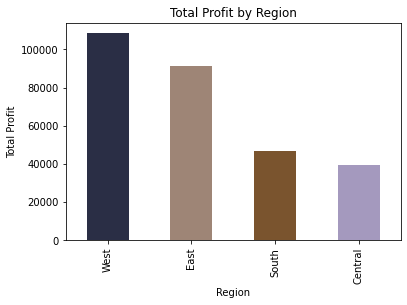

In [17]:
dfByRegion = superStoreDf.groupby('Region')
dfByRegion['Profit'].sum().sort_values(ascending=False).plot(kind='bar', color=[ '#2A2E45', '#9E8576', "#7A542E",'#A499BE'])
plt.ylabel('Total Profit')
plt.title("Total Profit by Region")

Text(0.5, 1.0, 'Total Sales by Region')

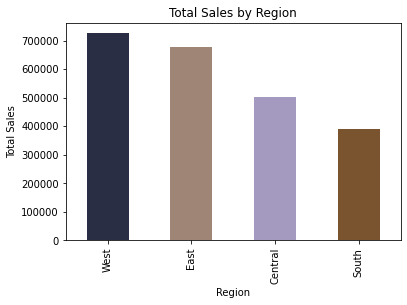

In [18]:
dfByRegion['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color=['#2A2E45', '#9E8576','#A499BE',"#7A542E"])
plt.ylabel('Total Sales')
plt.title("Total Sales by Region")

Text(0.5, 1.0, 'Mean Profit by Region')

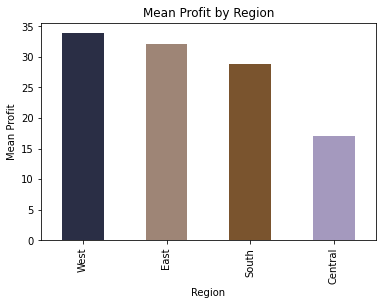

In [19]:
dfByRegion['Profit'].mean().sort_values(ascending=False).plot(kind='bar', color=[ '#2A2E45', '#9E8576', "#7A542E",'#A499BE'])
plt.ylabel('Mean Profit')
plt.title("Mean Profit by Region")

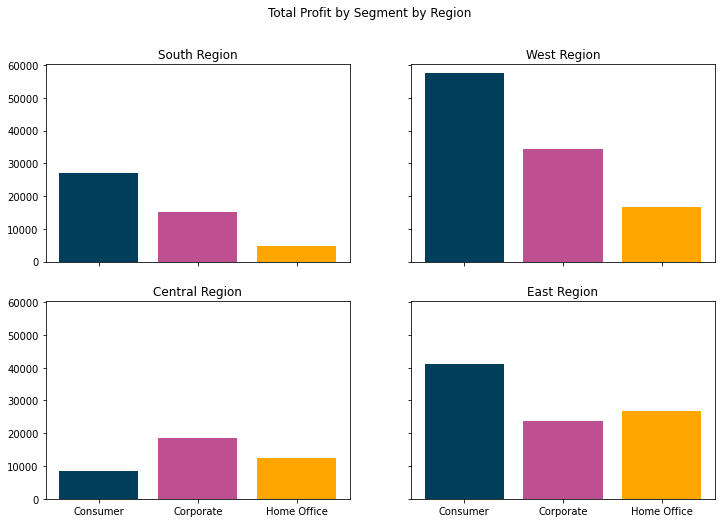

In [20]:
dfByRegionSegment = superStoreDf.groupby(['Region', 'Segment'])
fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
for idx, region in enumerate(regions):
    data = dfByRegionSegment['Profit'].sum()[region]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values, color=['#003f5c', '#bc5090', '#ffa600'])
    axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{region} Region")
plt.suptitle("Total Profit by Segment by Region")
plt.show()

Text(0.5, 0, 'Total Profit')

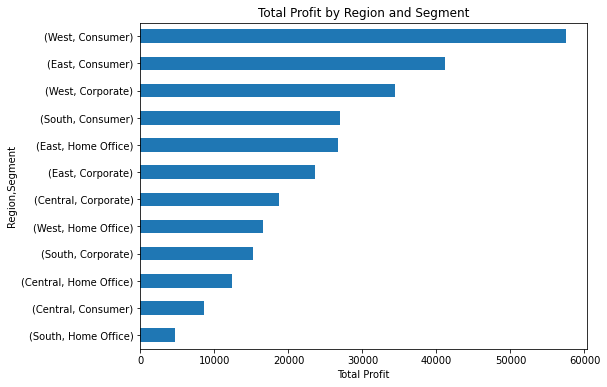

In [21]:
plt.figure(figsize=(8,6))
dfByRegionSegment['Profit'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title("Total Profit by Region and Segment")
plt.xlabel("Total Profit")

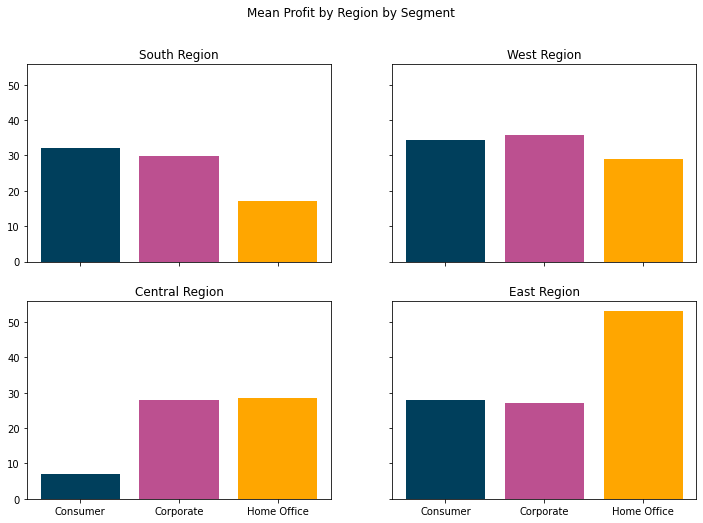

In [22]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
for idx, region in enumerate(regions):
    data = dfByRegionSegment['Profit'].mean()[region]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values, color=['#003f5c', '#bc5090', '#ffa600'])
    axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{region} Region")
plt.suptitle("Mean Profit by Region by Segment")
plt.show()

Text(0.5, 0, 'Mean Profit')

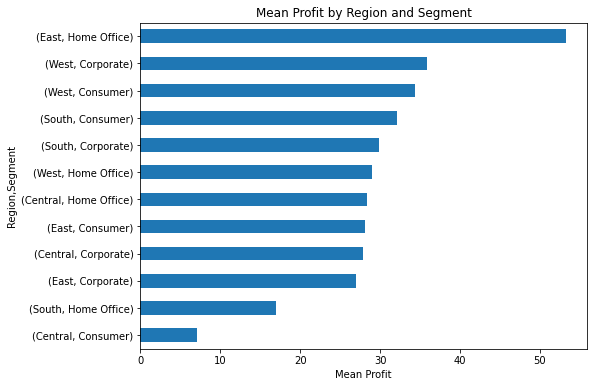

In [23]:
plt.figure(figsize=(8,6))
dfByRegionSegment['Profit'].mean().sort_values(ascending=True).plot(kind='barh')
plt.title("Mean Profit by Region and Segment")
plt.xlabel("Mean Profit")

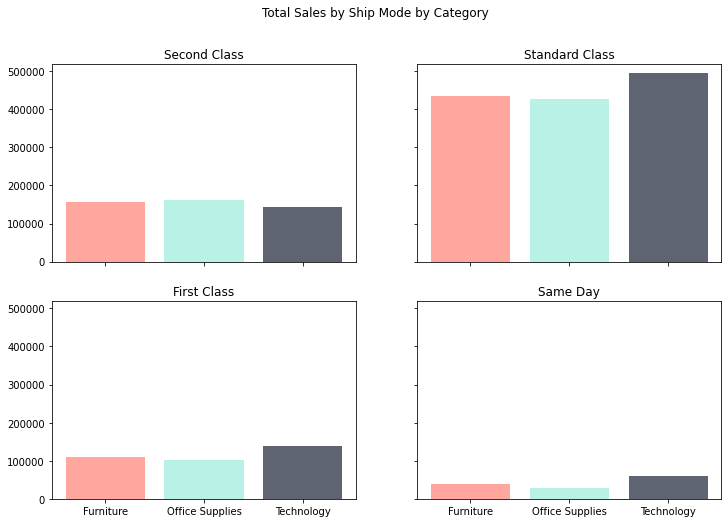

In [24]:
dfByShipCat = superStoreDf.groupby(['Ship Mode', 'Category'])
fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
for idx, shipMode in enumerate(shipModes):
    data = dfByShipCat['Sales'].sum()[shipMode]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values, color=['#FFA69E', '#B8F2E6', '#5E6472'])
    axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{shipMode}")
plt.suptitle("Total Sales by Ship Mode by Category")
plt.show()

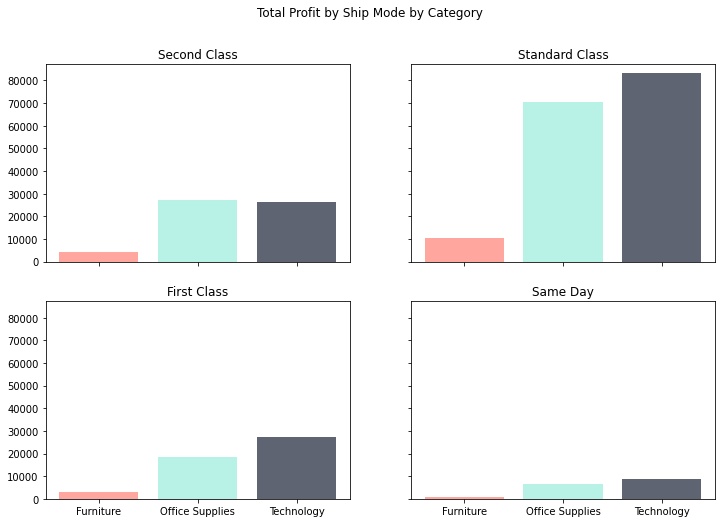

In [25]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
for idx, shipMode in enumerate(shipModes):
    data = dfByShipCat['Profit'].sum()[shipMode]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values, color=['#FFA69E', '#B8F2E6', '#5E6472'])
    axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{shipMode}")
plt.suptitle("Total Profit by Ship Mode by Category")
plt.show()

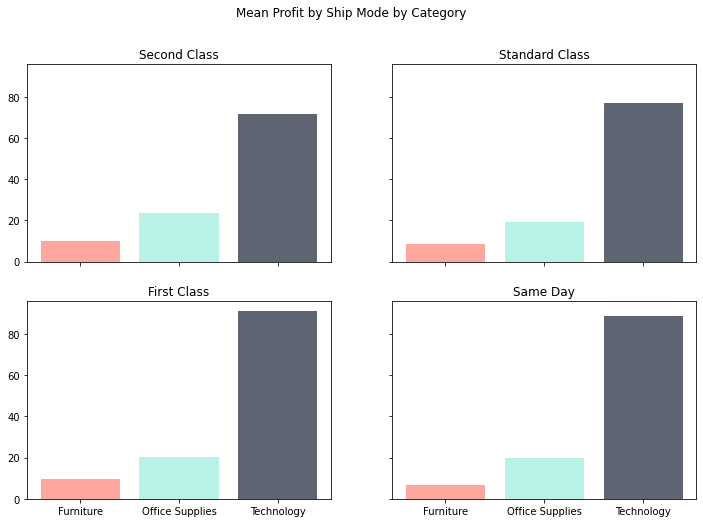

In [26]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
for idx, shipMode in enumerate(shipModes):
    data = dfByShipCat['Profit'].mean()[shipMode]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values, color=['#FFA69E', '#B8F2E6', '#5E6472'])
    axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{shipMode}")
plt.suptitle("Mean Profit by Ship Mode by Category")
plt.show()

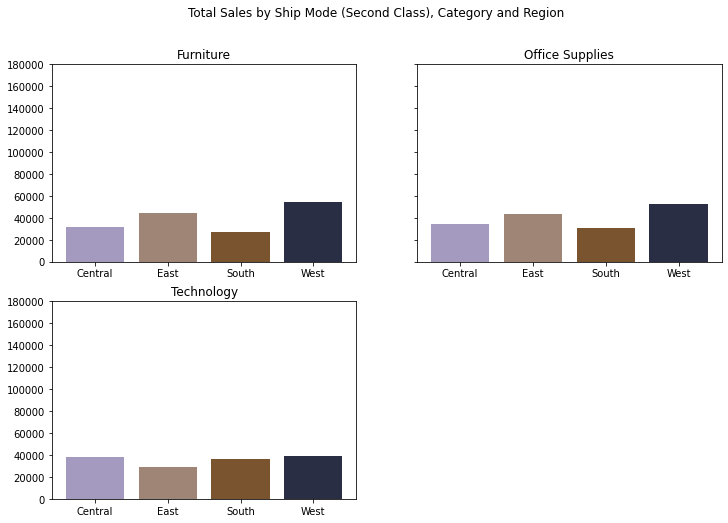

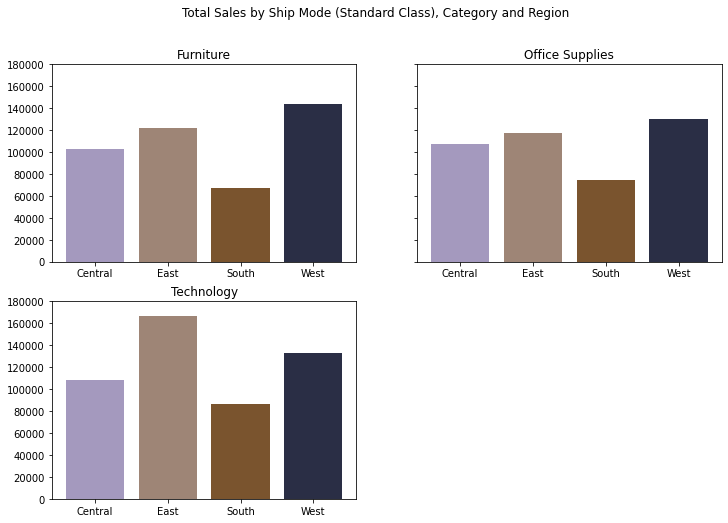

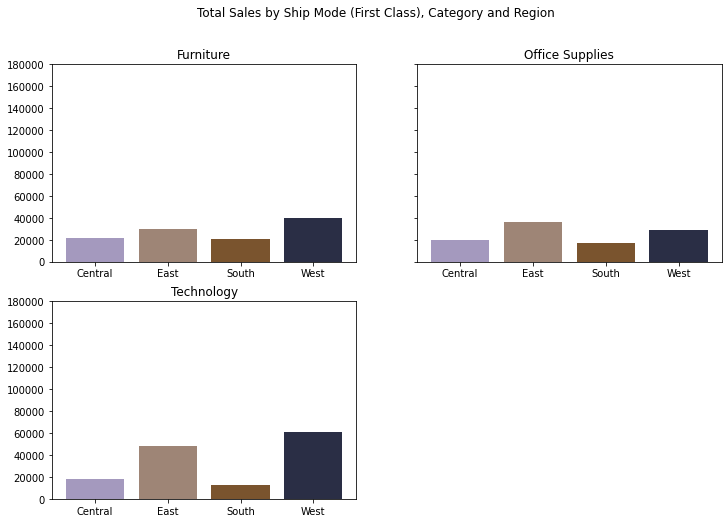

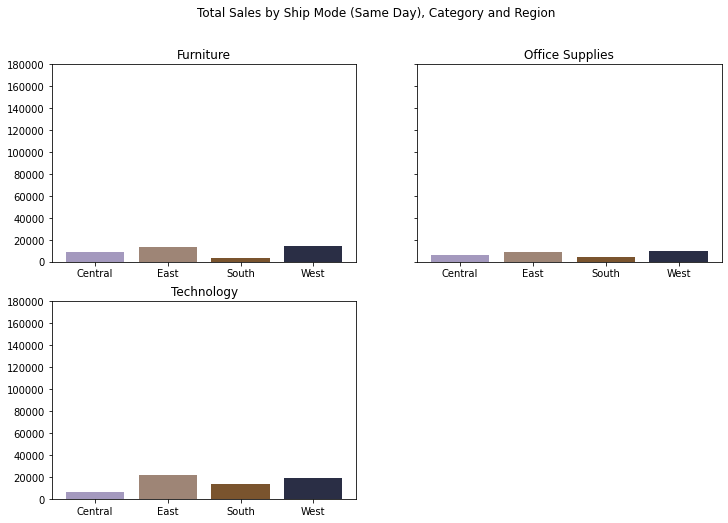

In [27]:
dfByShipCatReg = superStoreDf.groupby(['Ship Mode', 'Category', 'Region'])
for shipMode in shipModes:
    fig, axs = plt.subplots(2,2, sharey=True, figsize=(12,8))
    fig.delaxes(axs[1,1])
    axsIdx = [[0,0], [0,1], [1,0], [1,1]]
    for idx, category in enumerate(categories):
        data = dfByShipCatReg['Sales'].sum()[shipMode][category]
        axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values, color=['#A499BE', '#9E8576', "#7A542E", '#2A2E45'])
        axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{category}")
        plt.ylim(top=180000)
    plt.suptitle(f"Total Sales by Ship Mode ({shipMode}), Category and Region")
    plt.show()